# 基于分布

## 3-sigma

In [1]:
import numpy as np 
def three_sigma(s):
    mu, std = np.mean(s), np.std(s)
    lower, upper = mu-3*std, mu+3*std
    return lower, upper

In [2]:
data = np.random.normal(0,1,500)
lower,upper = three_sigma(data)

In [3]:
#异常值的个数
sum([d< lower or d>upper for d in data])

3

## Z-score等价于n-sigma

In [4]:

def z_score(s):
  z_score = (s - np.mean(s)) / np.std(s)
  return z_score

In [5]:
z_scores = z_score(data)
sum([z<-3 or z>3  for z in z_scores])

3

## box-plot

In [6]:
from matplotlib import pyplot as plt
def boxplot(s):
    q1, q3 = np.quantile(s,0.25), np.quantile(s,0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    plt.boxplot(s)
    plt.show()
    return lower, upper

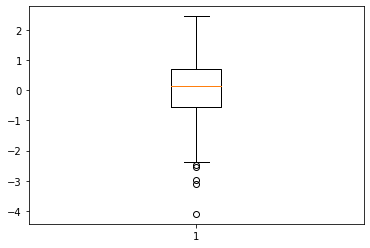

(-2.473709663876658, 2.5972573031311716)

In [7]:
boxplot(data)


## Grubbs假设检验

Grubbs’Test为一种假设检验的方法，常被用来检验服从正态分布的单变量数据集（univariate data set）Y中的单个异常值。若有异常值，则其必为数据集中的最大值或最小值。原假设与备择假设如下：

● H0: 数据集中没有异常值

● H1: 数据集中有一个异常值



使用Grubbs测试需要总体是正态分布的。算法流程：

1. 样本从小到大排序

2. 求样本的mean和dev

3. 计算min/max与mean的差距，更大的那个为可疑值

4. 求可疑值的z-score (standard score)，如果大于Grubbs临界值，那么就是outlier



Grubbs临界值可以查表得到，它由两个值决定：检出水平α（越严格越小），样本数量n，排除outlier，对剩余序列循环做 1-4 步骤 [1]。详细计算样例可以参考。

In [45]:

from OUTLIERS import smirnov_grubbs as grubbs
print(grubbs.test([8, 9, 10, 1, 9], alpha=0.05))
print(grubbs.min_test_outliers([8, 9, 10, 1, 9], alpha=0.05))
print(grubbs.max_test_outliers([8, 9, 10, 1, 9], alpha=0.05))
print(grubbs.max_test_indices([8, 9, 10, 50, 9], alpha=0.05))

[ 8  9 10  9]
[1]
[]
[3]


源码https://github.com/c-bata/outlier-utils/blob/master/outliers/smirnov_grubbs.py 

看下类GrubbsTest下的run函数就行

# 基于距离

## KNN

依次计算每个样本点与它最近的K个样本的平均距离，再利用计算的距离与阈值进行比较，如果大于阈值，则认为是异常点。

优点是不需要假设数据的分布，

缺点是仅可以找出全局异常点，无法找到局部异常点。

详解链接：https://mp.weixin.qq.com/s?__biz=MzA4OTAwMjY2Nw==&mid=2650190130&idx=1&sn=5a6873c719fe98be511579a0d092a7df&chksm=882396f6bf541fe063221b39fa8abe86d2d0763b69f54d7febd6d3de50f0e29bbefdea42eaa2&scene=21#wechat_redirect


In [9]:
from pyod.models.knn import KNN

# 初始化检测器clf
#contamination表示要选多少的异常值
clf = KNN( method='mean', n_neighbors=3, contamination=0.05)
clf.fit(data.reshape(len(data),-1))
# 返回训练数据上的分类标签 (0: 正常值, 1: 异常值)
y_train_pred = clf.labels_
# 返回训练数据上的异常值 (分值越大越异常)
y_train_scores = clf.decision_scores_
y_train_pred,y_train_scores

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 

# 基于密度

## LOF算法

几个概念：

1.K-近邻距离：离p点第K近的距离

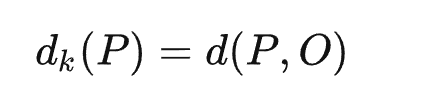

2.K-邻域:离p点最近的K个点

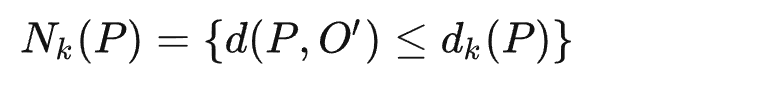

3.可达距离：P到O的第K可达距离，注意这里P和O的顺序,如果P在O的K邻域，那么P到O的可达距离为O的K近邻距离；反之，P到O的第K可达距离就为OP距离

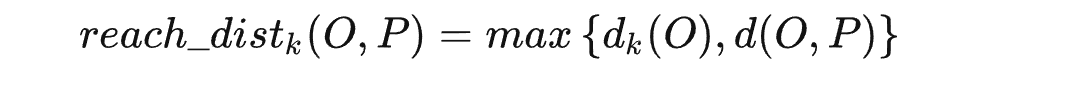
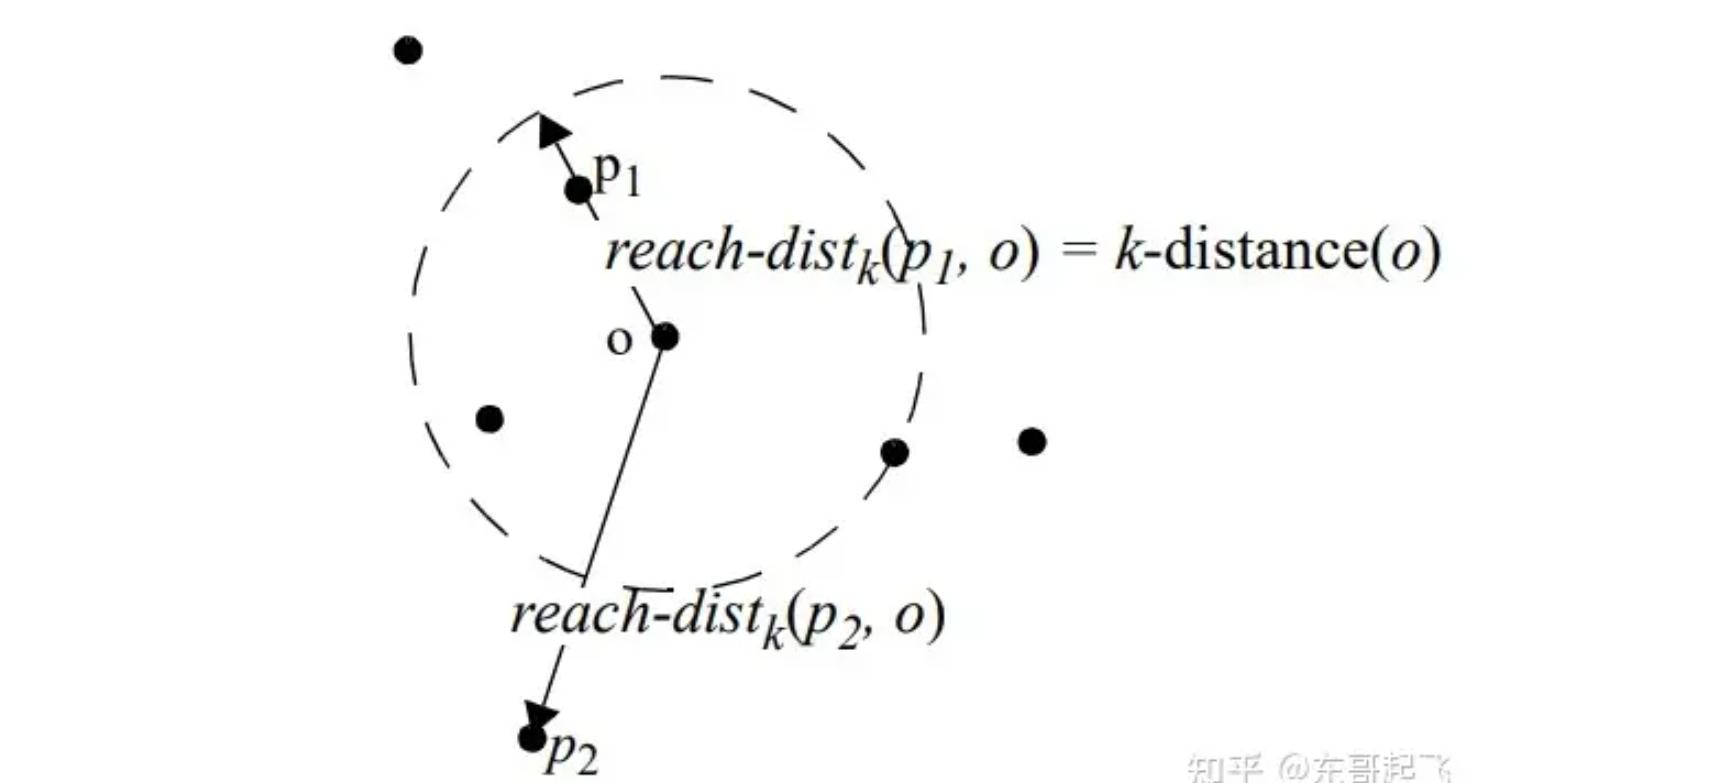

4.局部可达密度：局部可达距离的倒数,遍历P点的K近邻,计算P点所有K近邻的可达距离,如果计算结果较大,说明P点离他的K近邻是比较远的,即P的附近密度比较小

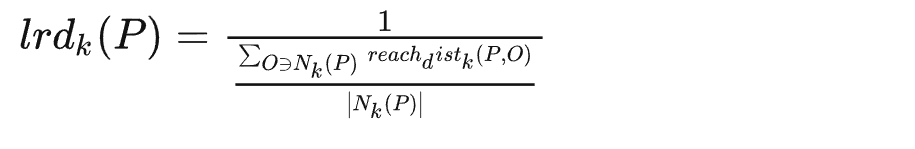

5.局部异常因子

按理说，局部可达密度越小数据就越异常。但是如果P的邻域里的其他点的局部可达密度也很小那怎么办？此时，要考虑一个相对的概念

局部异常因子计算,P点K邻域所有的点的局部可达密度,计算它们和P点的局部可达密度的比值,如果该值越大,说明P点相对更稀疏,也就更异常

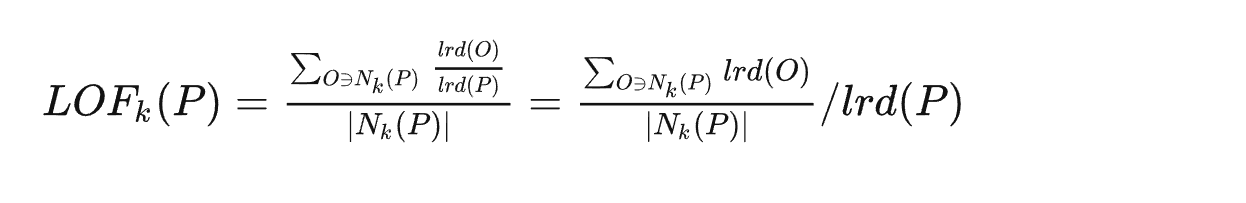

In [10]:
from sklearn.neighbors import LocalOutlierFactor as LOF

X = [[-1.1], [0.2], [100.1], [0.3]]
clf = LOF(n_neighbors=2,contamination=.1)
res = clf.fit_predict(X)
print(res)
print(clf.negative_outlier_factor_)

[ 1  1 -1  1]
[ -0.98214286  -1.03703704 -72.64219576  -0.98214286]


## COF算法

COF算法有别于LOF算法，它的距离度量更改为链式距离。什么是链式距离？

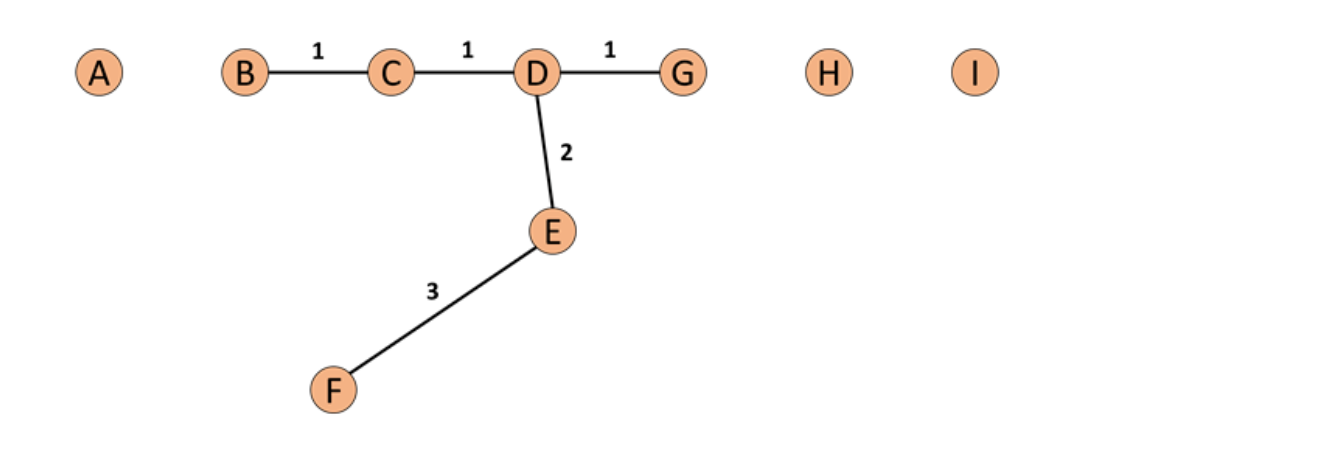

上图展示了F点的K-邻域到F点的链式距离

具体实现这个链式距离的计算需要经过：

1.找出F点的K邻域,两两连结形成一张图

2.寻找图的最小生成树

3.再寻找F的最短K邻域的路径

计算链式距离：链式距离越大说明F点附近越稀疏

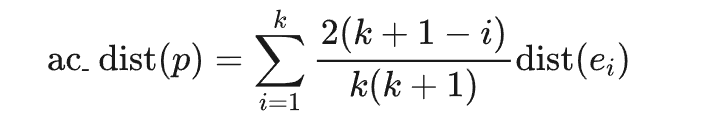

计算COF值，代表相对的链式距离,COF越大说明样本点越异常

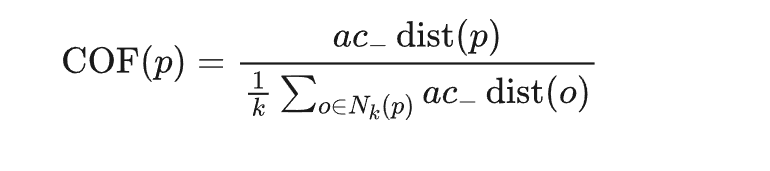

In [11]:
from pyod.models.cof import COF
from sklearn.datasets import load_iris

iris = load_iris()


cof = COF(contamination = 0.06,  ## 异常值所占的比例
          n_neighbors = 20,      ## 近邻数量
        )
cof_label = cof.fit_predict(iris['data']) # 鸢尾花数据
print("检测出的异常值数量为:",np.sum(cof_label == 1))

检测出的异常值数量为: 9


d:\Anaconda\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [12]:
#cof.fit_predict(iris['data'])
print('异常值的概率')
cof.predict_proba(iris['data'])[:,1]

异常值的概率


array([0.        , 0.1808978 , 0.35233466, 0.2110075 , 0.0211272 ,
       0.59439051, 0.58765404, 0.11291911, 0.40900974, 0.13260956,
       0.39187057, 0.4006584 , 0.22764434, 0.40813061, 0.9153456 ,
       0.90153101, 0.60373785, 0.03201683, 0.73937241, 0.21754831,
       0.48488407, 0.15426449, 0.9191342 , 0.52175434, 0.52787769,
       0.15299558, 0.2756885 , 0.06527777, 0.18732712, 0.14769524,
       0.12621683, 0.4554197 , 0.48230799, 0.79965248, 0.12273708,
       0.40814289, 0.39433898, 0.15388665, 0.30659268, 0.11660774,
       0.10126288, 0.8313486 , 0.36337205, 0.35954747, 0.76047867,
       0.22568489, 0.30705079, 0.24818482, 0.18761947, 0.14442496,
       0.26653438, 0.17555565, 0.3176353 , 0.21138635, 0.17280612,
       0.26993857, 0.33586617, 0.55454583, 0.09318012, 0.35125693,
       0.50600865, 0.21412113, 0.3720676 , 0.28825599, 0.51938397,
       0.13732144, 0.21545857, 0.14946219, 0.68274494, 0.17030806,
       0.23791387, 0.24254808, 0.38455482, 0.42719008, 0.17350

## SOS算法

根据下图,

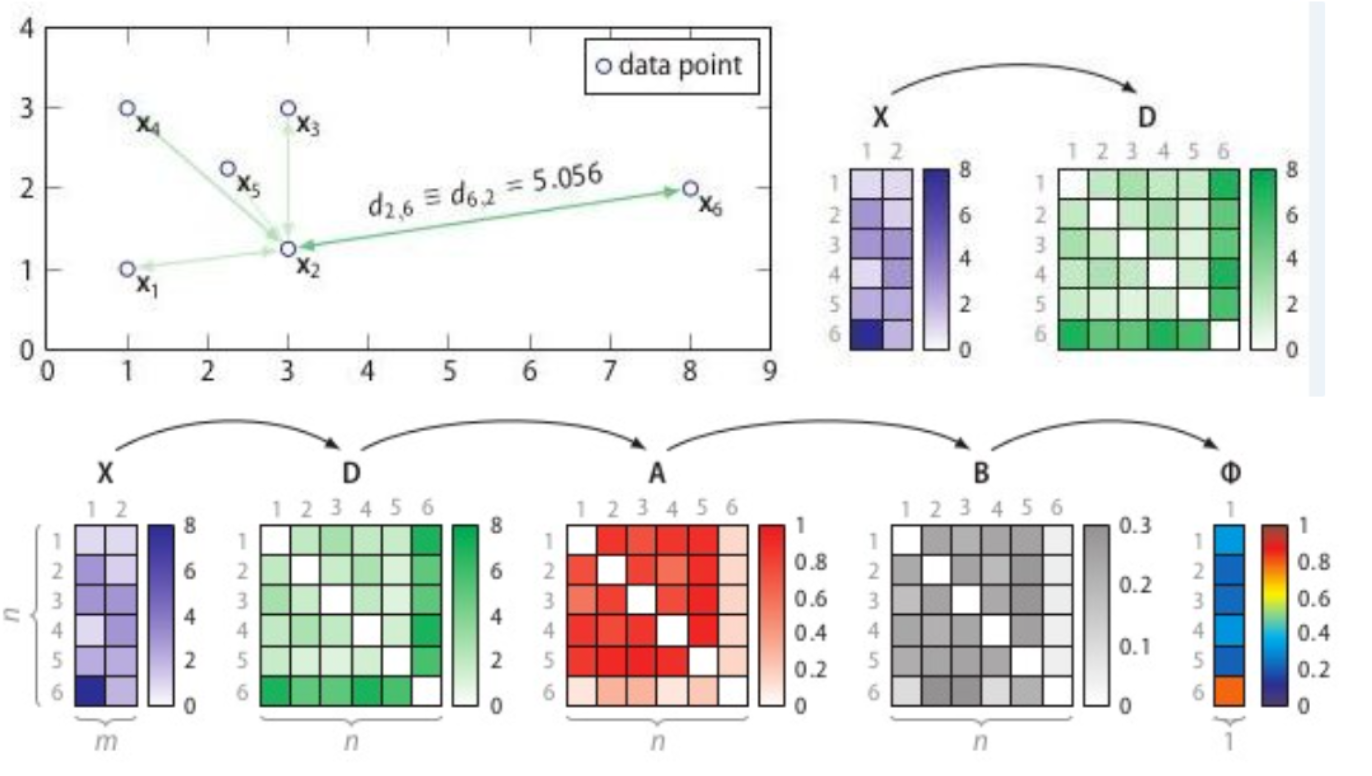

In [13]:
import pandas as pd
from sksos import SOS
detector = SOS()

detector.predict(iris['data'])



array([0.18867538, 0.31967605, 0.29748862, 0.32826721, 0.22486299,
       0.44333195, 0.37595668, 0.18305145, 0.51373006, 0.28883733,
       0.30246009, 0.27112572, 0.34213736, 0.64927376, 0.69811727,
       0.75212287, 0.47111364, 0.19257508, 0.58660878, 0.28468432,
       0.44734752, 0.27544262, 0.70726467, 0.40061108, 0.54773423,
       0.40532301, 0.23960374, 0.20813355, 0.23636128, 0.29359313,
       0.28999433, 0.39194343, 0.55373391, 0.55075092, 0.25249854,
       0.39300607, 0.47848135, 0.31891155, 0.46496831, 0.18796621,
       0.25544875, 0.88674093, 0.45823842, 0.42201801, 0.56508077,
       0.34094082, 0.31730694, 0.29549377, 0.26271593, 0.21600789,
       0.55559525, 0.32071457, 0.40284175, 0.39009698, 0.28025899,
       0.28996791, 0.36631277, 0.53091697, 0.31306163, 0.47336753,
       0.65938776, 0.32312501, 0.60063449, 0.19799203, 0.51952688,
       0.405855  , 0.32322214, 0.33894774, 0.47358531, 0.28482894,
       0.36925951, 0.38984519, 0.30585801, 0.33929496, 0.33409

# 基于聚类

## DBSCAN

In [46]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)

clustering.labels_

array([ 0,  0,  0,  1,  1, -1], dtype=int64)

# 基于树模型

## 孤立森林

随机选择m个特征，通过在所选特征的最大值和最小值之间随机选择一个值来分割数据点。

观察值的划分递归地重复，直到所有的观察值被孤立。

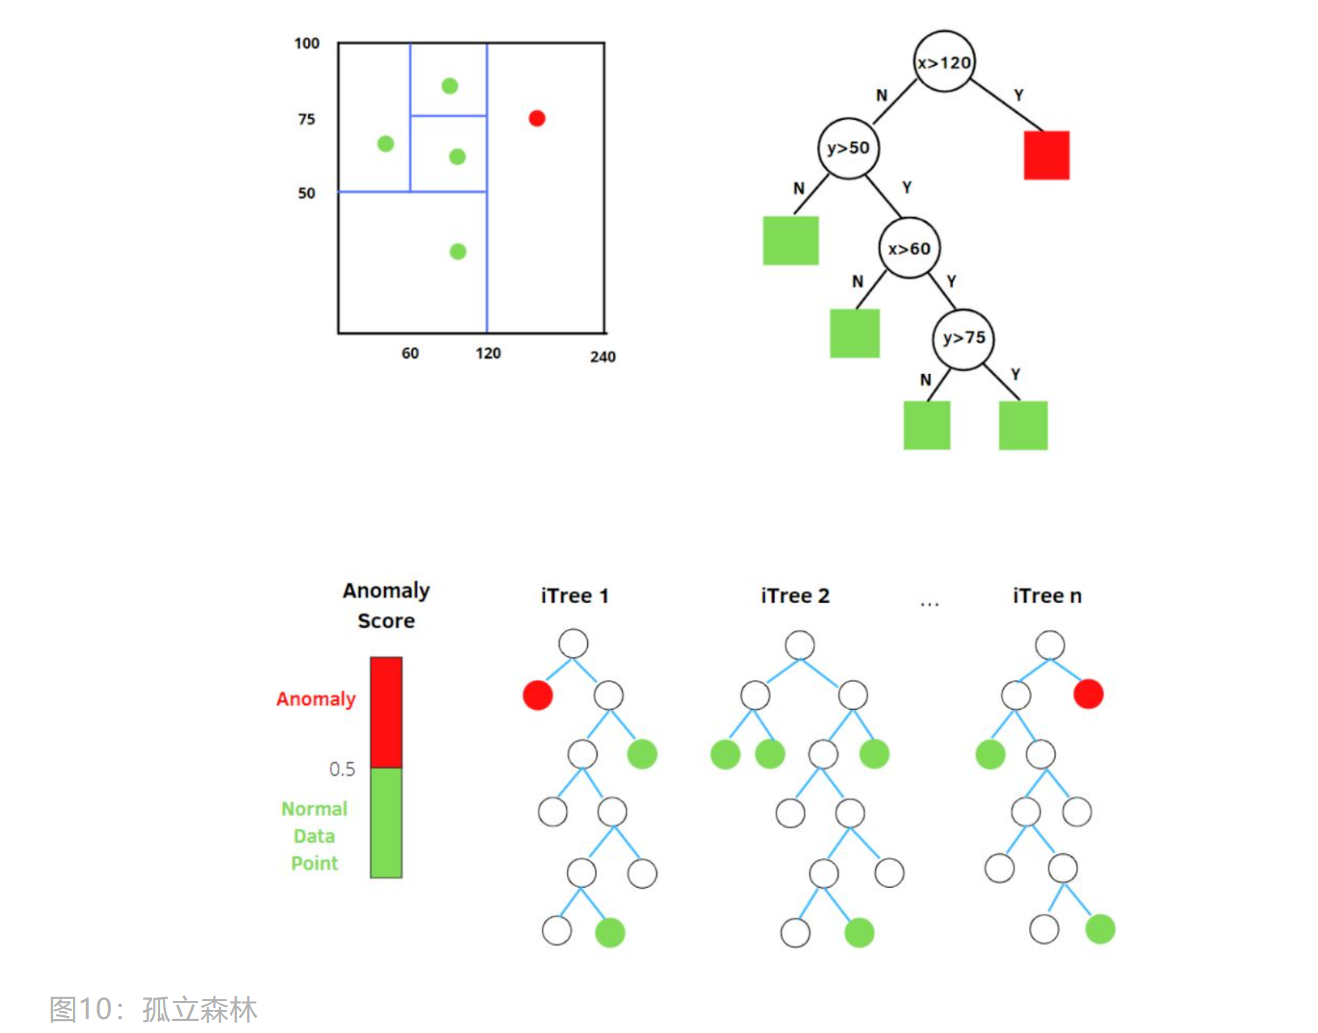

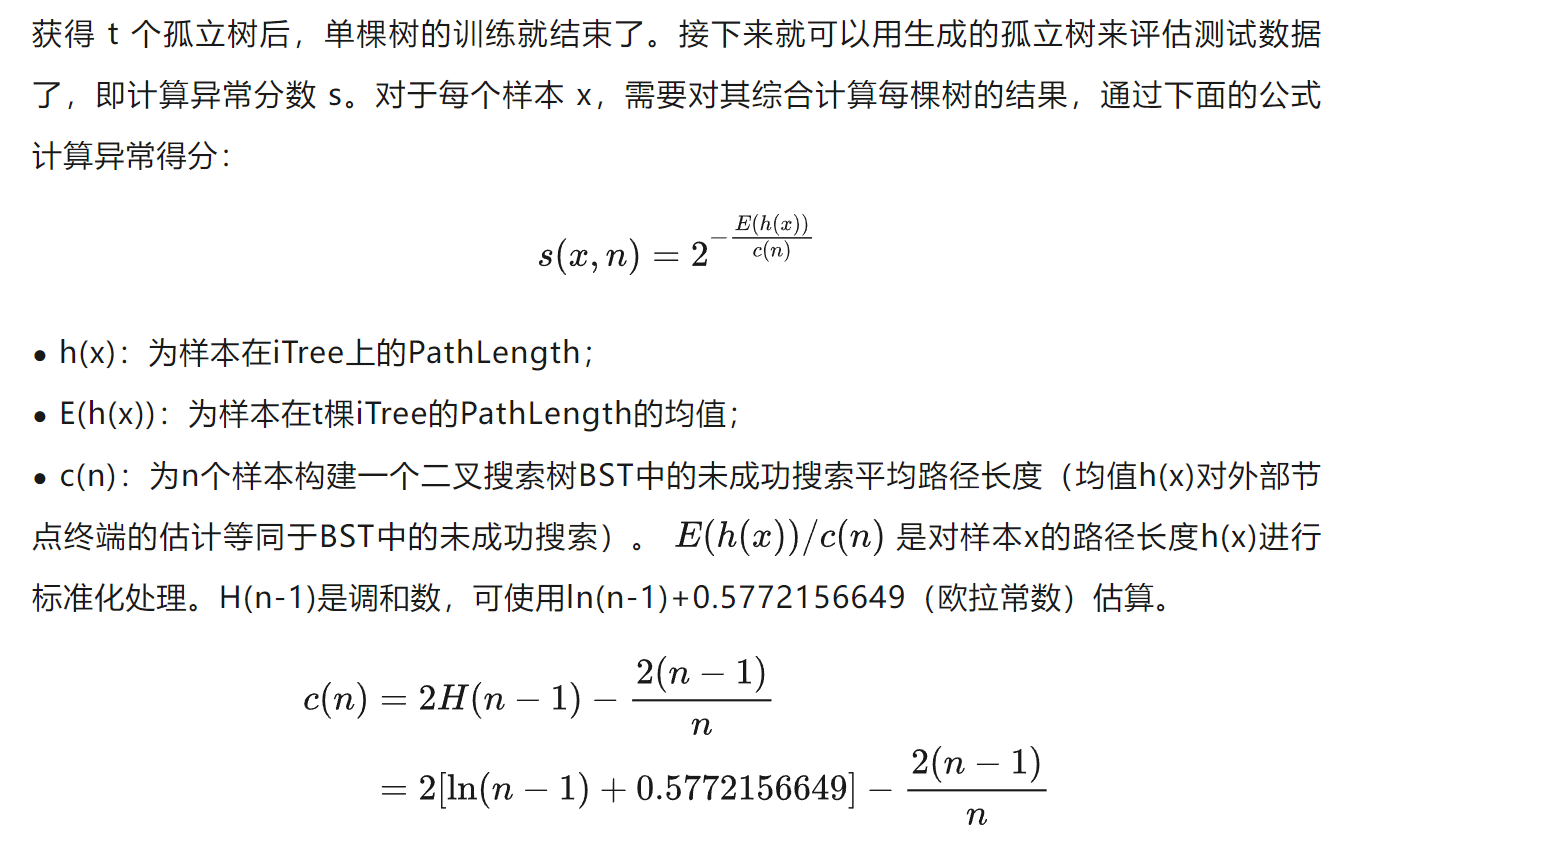

s值域为(0,1)。当PathLength越小，s越接近1，此时样本为异常值的概率越大

In [15]:

# Ref：https://zhuanlan.zhihu.com/p/484495545
from sklearn.datasets import load_iris 
from sklearn.ensemble import IsolationForest

data = load_iris(as_frame=True) 
X,y = data.data,data.target 
df = data.frame 

# 模型训练
iforest = IsolationForest(n_estimators=100, max_samples='auto',  
                          contamination=0.05, max_features=4,  
                          bootstrap=False, n_jobs=-1, random_state=1)

#  fit_predict 函数 训练和预测一起 可以得到模型是否异常的判断，-1为异常，1为正常
df['label'] = iforest.fit_predict(X) 

# 预测 decision_function 可以得出 异常评分
df['scores'] = iforest.decision_function(X)
#只算了指数吧
df[df['label']==-1]

d:\Anaconda\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label,scores
13,4.3,3.0,1.1,0.1,0,-1,-0.039104
15,5.7,4.4,1.5,0.4,0,-1,-0.003895
41,4.5,2.3,1.3,0.3,0,-1,-0.038639
60,5.0,2.0,3.5,1.0,1,-1,-0.008813
109,7.2,3.6,6.1,2.5,2,-1,-0.037663
117,7.7,3.8,6.7,2.2,2,-1,-0.046873
118,7.7,2.6,6.9,2.3,2,-1,-0.055233
131,7.9,3.8,6.4,2.0,2,-1,-0.064742


# 基于PCA

In [21]:
from sklearn.decomposition import PCA
import numpy as np

np.random.seed(42)  # 设置随机种子以获得可重复的结果

num_samples = 500
num_variables = 20

mean = np.zeros(num_variables)  # 均值向量
cov  = np.eye(num_variables) * 1 + np.ones((num_variables, num_variables)) * 0.7
  # 协方差矩阵（这里假设所有变量之间的协方差为0）

centered_training_data = np.random.multivariate_normal(mean, cov, num_samples)

pca = PCA()

pca.fit(centered_training_data)
transformed_data = pca.transform(centered_training_data)
y = centered_training_data

# 计算异常分数
lambdas = pca.singular_values_
M = ((y*y)/lambdas)

# 前k个特征向量和后r个特征向量
q = 5

r = 15

# 对每个样本点进行距离求和的计算
major_components = M[:,range(q)]
minor_components = M[:,range(r, 20)]
major_components = np.sum(major_components, axis=1)
minor_components = np.sum(minor_components, axis=1)

# 人为设定c1、c2阈值
components = pd.DataFrame({'major_components': major_components, 
                               'minor_components': minor_components})
c1 = components.quantile(0.99)['major_components']
c2 = components.quantile(0.99)['minor_components']

# 制作分类器
def classifier(major_components, minor_components):  
    major = major_components > c1
    minor = minor_components > c2    
    return np.logical_or(major,minor)

results = classifier(major_components=major_components, minor_components=minor_components)

In [23]:
sum(results==True)

7

# 自编码器

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 22        
_________________________________________________________________
dense_18 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_19 (Dense)             (None, 20)                220       
Total params: 482
Trainable params: 482
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
95/95 [==============================] - 0s 1ms/step - loss: 1.7307 - val_loss: 1.7120
Epoch 2/100
95/95 [==============================] - 0s 500us/step - loss: 1.5535 - val_loss: 1.4475
Epoch 3/100
95/95 [==============================

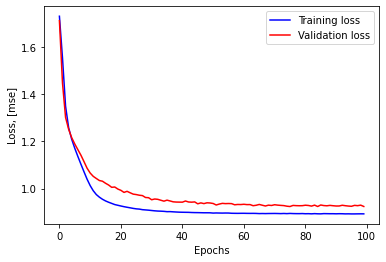

d:\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Loss_mae,Threshold,Anomaly
0,0.671835,0.3,True
1,0.952960,0.3,True
2,0.669328,0.3,True
3,0.711877,0.3,True
4,0.890973,0.3,True


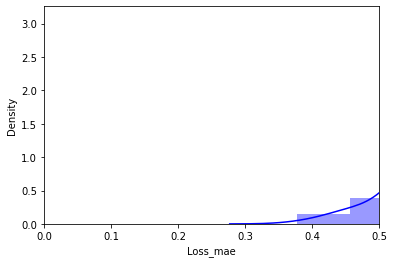

In [32]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
import seaborn as sns

# 标准化数据
X_train = np.random.multivariate_normal(mean, cov, 1000)

X_test =  np.random.multivariate_normal(mean, cov, 300)

tf.random.set_seed(10)
act_func = 'relu'
# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X.
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )
model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))
model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))
model.compile(loss='mse',optimizer='adam')
print(model.summary())

# Train model for 100 epochs, batch size of 10:
NUM_EPOCHS=100
BATCH_SIZE=10
history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE,
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1)

plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.show()

# 查看训练集还原的误差分布如何，以便制定正常的误差分布范围
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred)
scored = pd.DataFrame()
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10,
             kde= True,
            color = 'blue')
plt.xlim([0.0,.5])

# 误差阈值比对，找出异常值
X_pred = model.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred)
threshod = 0.3
scored = pd.DataFrame()
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored['Threshold'] = threshod
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

# One-class SVM

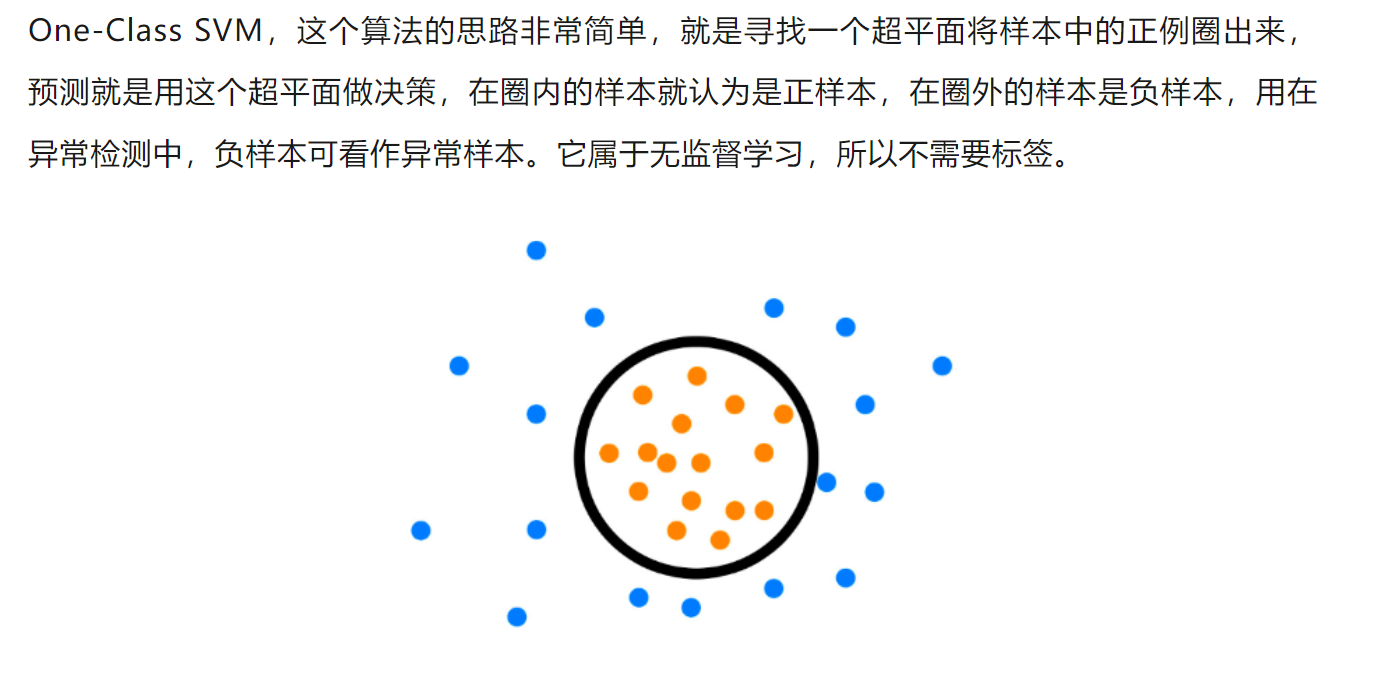
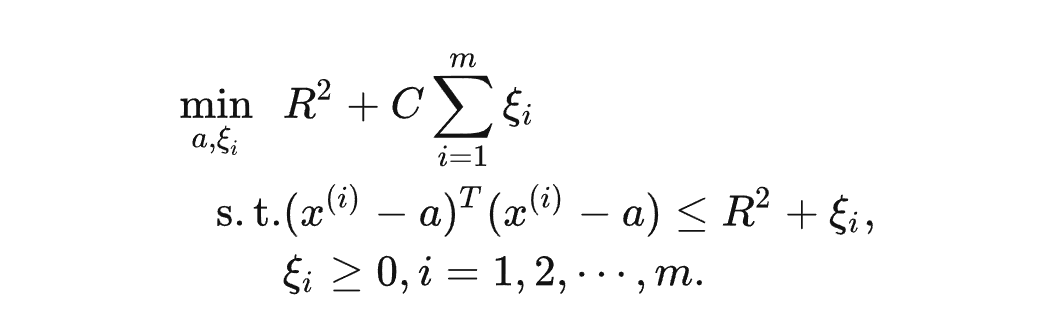

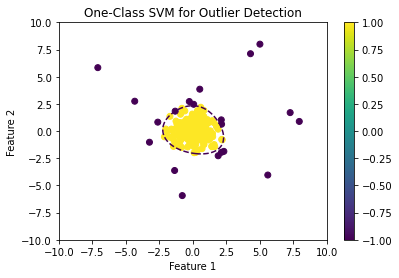

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# 创建一些示例数据
np.random.seed(42)
normal_data = np.random.randn(200, 2)  # 正常数据
outlier_data = np.random.uniform(low=-8, high=8, size=(10, 2))  # 异常数据

# 组合正常数据和异常数据
data = np.concatenate((normal_data, outlier_data), axis=0)

# 创建并训练One-Class SVM模型
model = svm.OneClassSVM(nu=0.1, kernel='rbf', gamma=0.1)
model.fit(data)

# 预测数据的标签（正常/异常）
labels = model.predict(data)
n_error_outlier = sum(labels==-1)
# 绘制数据点和异常值的区域
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.colorbar()

# 绘制决策边界
xx, yy = np.meshgrid(np.linspace(-10, 10, 500), np.linspace(-10, 10, 500))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linestyles='dashed')

plt.title("One-Class SVM for Outlier Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [44]:
n_error_outlier

20